# 準備

## SWIG を準備

In [1]:
!apt-get -q -y install swig      # swigをインストール

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  swig3.0
Suggested packages:
  swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  swig swig3.0
0 upgraded, 2 newly installed, 0 to remove and 8 not upgraded.
Need to get 1,100 kB of archives.
After this operation, 5,822 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig3.0 amd64 3.0.12-1 [1,094 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 swig amd64 3.0.12-1 [6,460 B]
Fetched 1,100 kB in 3s (408 kB/s)
Selecting previously unselected package swig3.0.
(Reading database ... 131284 files and directories currently installed.)
Preparing to unpack .../swig3.0_3.0.12-1_amd64.deb ...
Unpacking swig3.0 (3.0.12-1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_3.0.12-1_amd64.deb ...
Unpacking swig (3.0.12-1)

## TF-openposeをクローン


In [2]:
!git clone https://www.github.com/ildoonet/tf-openpose
!ls

Cloning into 'tf-openpose'...
remote: Enumerating objects: 1254, done.
remote: Total 1254 (delta 0), reused 0 (delta 0), pack-reused 1254
Receiving objects: 100% (1254/1254), 84.38 MiB | 10.57 MiB/s, done.
Resolving deltas: 100% (660/660), done.
sample_data  tf-openpose


確認

In [3]:
%cd tf-openpose
!ls

/content/tf-openpose
CMakeLists.txt	__init__.py  package.xml	run.py	       tf_pose
docker		launch	     README.md		run_video.py
Dockerfile	LICENSE      requirements.txt	run_webcam.py
etcs		models	     run_checkpoint.py	scripts
images		msg	     run_directory.py	setup.py


##  requirements.txtの中身をインストール

In [4]:
!pip3 install -r requirements.txt

  Cloning https://github.com/ppwwyyxx/tensorpack.git to /tmp/pip-req-build-76xg7yaj
  Stored in directory: /root/.cache/pip/wheels/2a/1a/4d/6b30377c3051e76559d1185c1dbbfff15aed31f87acdd14c22
  Stored in directory: /tmp/pip-ephem-wheel-cache-j0r4ebyr/wheels/a8/b5/a9/025b3a1294b9ffff93309e6956c65aa80e0fa40821d29eff1e
Successfully built fire tensorpack
thinc 6.12.1 has requirement msgpack-numpy<0.4.4, but you'll have msgpack-numpy 0.4.4.2 which is incompatible.
thinc 6.12.1 has requirement wrapt<1.11.0,>=1.10.0, but you'll have wrapt 1.11.1 which is incompatible.
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: msgpack-numpy 0.4.3.2
    Uninstalling msgpack-numpy-0.4.3.2:
      Successfully uninstalled msgpack-numpy-0.4.3.2


## モデルをダウンロード

In [5]:
%cd models/graph/cmu
!bash download.sh


/content/tf-openpose/models/graph/cmu
[download] model graph : cmu
--2019-02-26 13:25:44--  http://download686.mediafire.com/ccy5zrtassog/qlzzr20mpocnpa3/graph_opt.pb
Resolving download686.mediafire.com (download686.mediafire.com)... 205.196.120.134
Connecting to download686.mediafire.com (download686.mediafire.com)|205.196.120.134|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209299198 (200M) [application/octet-stream]
Saving to: ‘/content/tf-openpose/models/graph/cmu/graph_opt.pb’

/content/tf-openpos 100%[===================>] 199.60M  1.07MB/s    in 3m 12s  

2019-02-26 13:28:56 (1.04 MB/s) - ‘/content/tf-openpose/models/graph/cmu/graph_opt.pb’ saved [209299198/209299198]

[download] end


ダウンロードできているか確認してtf-openposeディレクトリに戻る。

In [6]:
!ls
!pwd
%cd ../../../

download.sh  graph_opt.pb  __init__.py
/content/tf-openpose/models/graph/cmu
/content/tf-openpose


## pafprocessをインストール

In [7]:
%cd tf_pose/pafprocess
!ls
!swig -python -c++ pafprocess.i && python3 setup.py build_ext --inplace

/content/tf-openpose/tf_pose/pafprocess
__init__.py  pafprocess.cpp  pafprocess.i   pafprocess_wrap.cpp  setup.py
numpy.i      pafprocess.h    pafprocess.py  README.md
running build_ext
building '_pafprocess' extension
swigging pafprocess.i to pafprocess_wrap.cpp
swig -python -c++ -o pafprocess_wrap.cpp pafprocess.i
creating build
creating build/temp.linux-x86_64-3.6
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I. -I/usr/include/python3.6m -c pafprocess.cpp -o build/temp.linux-x86_64-3.6/pafprocess.o
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -I. -I/usr/include/python3.6m -c pafprocess_wrap.cpp -o build/temp.linux-x86_64-3.6/pafprocess_wrap.

In [8]:
%cd ../../
!ls

/content/tf-openpose
CMakeLists.txt	__init__.py  package.xml	run.py	       tf_pose
docker		launch	     README.md		run_video.py
Dockerfile	LICENSE      requirements.txt	run_webcam.py
etcs		models	     run_checkpoint.py	scripts
images		msg	     run_directory.py	setup.py


# 実験

## まずは、静止画で実験してみる。

In [9]:
!wget https://www.pakutaso.com/shared/img/thumb/150415022548_TP_V.jpg

--2019-02-26 13:34:26--  https://www.pakutaso.com/shared/img/thumb/150415022548_TP_V.jpg
Resolving www.pakutaso.com (www.pakutaso.com)... 180.235.251.31
Connecting to www.pakutaso.com (www.pakutaso.com)|180.235.251.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 247056 (241K) [image/jpeg]
Saving to: ‘150415022548_TP_V.jpg’

150415022548_TP_V.j 100%[===================>] 241.27K  --.-KB/s    in 0.1s    

2019-02-26 13:34:27 (2.10 MB/s) - ‘150415022548_TP_V.jpg’ saved [247056/247056]



In [10]:
!ls

150415022548_TP_V.jpg  __init__.py  README.md	       run_webcam.py
CMakeLists.txt	       launch	    requirements.txt   scripts
docker		       LICENSE	    run_checkpoint.py  setup.py
Dockerfile	       models	    run_directory.py   tf_pose
etcs		       msg	    run.py
images		       package.xml  run_video.py


[2019-02-26 13:34:46,974] [TfPoseEstimator] [INFO] loading graph from /content/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)
[2019-02-26 13:34:46,974] [TfPoseEstimator] [INFO] loading graph from /content/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=432x368)


Instructions for updating:
Colocations handled automatically by placer.


[2019-02-26 13:34:51,743] [TfPoseEstimator] [DEBUG] inference+ original shape=1600x1021
[2019-02-26 13:34:51,743] [TfPoseEstimator] [DEBUG] inference+ original shape=1600x1021
[2019-02-26 13:34:51,801] [TfPoseEstimator] [DEBUG] inference- heatMat=216x184 pafMat=216x184
[2019-02-26 13:34:51,801] [TfPoseEstimator] [DEBUG] inference- heatMat=216x184 pafMat=216x184
[2019-02-26 13:34:51,809] [TfPoseEstimator] [DEBUG] estimate time=0.00372
[2019-02-26 13:34:51,809] [TfPoseEstimator] [DEBUG] estimate time=0.00372
[2019-02-26 13:34:51,811] [TfPoseEstimator] [INFO] inference image: 150415022548_TP_V.jpg in 0.0678 seconds.
[2019-02-26 13:34:51,811] [TfPoseEstimator] [INFO] inference image: 150415022548_TP_V.jpg in 0.0678 seconds.


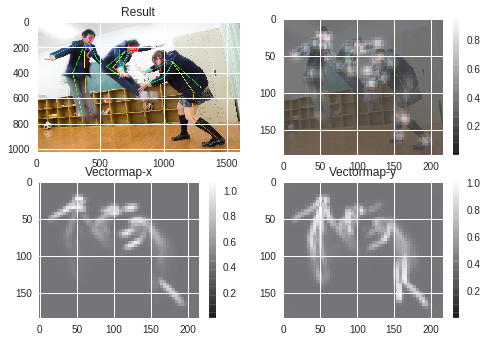

In [11]:
%run -i run.py --model=mobilenet_thin --resize=432x368 --image=150415022548_TP_V.jpg

## 動画で実行

Googleドライブから動画を読み込むための作業です。

In [0]:
from google.colab import drive
drive.mount('./gdrive')
drive_root_dir="./gdrive/My Drive/Colab Notebooks/"

ファイルを確認＆colaboratoryにコピー

In [13]:
!ls './gdrive/My Drive/Colab Notebooks/movies/'

!cp './gdrive/My Drive/Colab Notebooks/movies/climbing2.mp4' "./"

!ls

climbing2.mp4  climbing.mp4  image  ImgVideo2.mp4  ImgVideo.mp4
150415022548_TP_V.jpg  gdrive	    msg		       run.py
climbing2.mp4	       images	    package.xml        run_video.py
CMakeLists.txt	       __init__.py  README.md	       run_webcam.py
docker		       launch	    requirements.txt   scripts
Dockerfile	       LICENSE	    run_checkpoint.py  setup.py
etcs		       models	    run_directory.py   tf_pose


実行です！！
run_video.pyだとうまく実行できなかったので、スクリプトを改造し実行しちゃいます。

In [17]:
import argparse
import logging
import time
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

from tf_pose import common
from tf_pose.estimator import TfPoseEstimator
from tf_pose.networks import get_graph_path, model_wh

movie_name = 'climbing2'

img_outdir = './img'
os.makedirs(img_outdir, exist_ok=True)

# 動画作成
fourcc = cv2.VideoWriter_fourcc('m','p','4', 'v')
video  = cv2.VideoWriter('ImgVideo2.mp4', fourcc, 30.0, (540, 960))


if __name__ == '__main__':
    parser = argparse.ArgumentParser(description='tf-pose-estimation Video')
    
    outimg_files = []
    count = 0
    w = 544 
    h = 960
    e = TfPoseEstimator(get_graph_path('mobilenet_thin'), target_size=(w, h))
    
    # 動画出力先
    cap = cv2.VideoCapture('climbing2.mp4')

    # 動画用の画像作成
    while True:
        ret, image = cap.read()
        
        if ret == True:
            # １フレームずつ処理
            count += 1
            if count % 100 == 0:
                print('Image No.：{0}'.format(count))
            
            humans = e.inference(image, resize_to_default=(w > 0 and h > 0), upsample_size=4)
            image = TfPoseEstimator.draw_humans(image, humans, imgcopy=False)
            
            # 画像出力
            outimg_file = '{}/{:05d}.jpg'.format(img_outdir, count)
            cv2.imwrite(outimg_file, image)
            video.write(image)       
            
        else:
            break
    video.release()
    

[2019-02-26 13:42:14,885] [TfPoseEstimator] [INFO] loading graph from /content/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=544x960)
[2019-02-26 13:42:14,885] [TfPoseEstimator] [INFO] loading graph from /content/tf-openpose/models/graph/mobilenet_thin/graph_opt.pb(default size=544x960)
[2019-02-26 13:42:16,627] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:16,627] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:16,754] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:16,754] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:16,764] [TfPoseEstimator] [DEBUG] estimate time=0.00809
[2019-02-26 13:42:16,764] [TfPoseEstimator] [DEBUG] estimate time=0.00809
[2019-02-26 13:42:16,788] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:16,788] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 

Image No.：100


[2019-02-26 13:42:34,559] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:34,559] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:34,572] [TfPoseEstimator] [DEBUG] estimate time=0.01045
[2019-02-26 13:42:34,572] [TfPoseEstimator] [DEBUG] estimate time=0.01045
[2019-02-26 13:42:34,593] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:34,593] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:34,738] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:34,738] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:34,751] [TfPoseEstimator] [DEBUG] estimate time=0.00988
[2019-02-26 13:42:34,751] [TfPoseEstimator] [DEBUG] estimate time=0.00988
[2019-02-26 13:42:34,774] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:34,774] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：200


[2019-02-26 13:42:52,444] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:52,444] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:52,460] [TfPoseEstimator] [DEBUG] estimate time=0.01179
[2019-02-26 13:42:52,460] [TfPoseEstimator] [DEBUG] estimate time=0.01179
[2019-02-26 13:42:52,480] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:52,480] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:52,631] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:52,631] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:42:52,646] [TfPoseEstimator] [DEBUG] estimate time=0.01026
[2019-02-26 13:42:52,646] [TfPoseEstimator] [DEBUG] estimate time=0.01026
[2019-02-26 13:42:52,665] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:42:52,665] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：300


[2019-02-26 13:43:10,269] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:10,269] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:10,282] [TfPoseEstimator] [DEBUG] estimate time=0.01025
[2019-02-26 13:43:10,282] [TfPoseEstimator] [DEBUG] estimate time=0.01025
[2019-02-26 13:43:10,308] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:10,308] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:10,458] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:10,458] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:10,471] [TfPoseEstimator] [DEBUG] estimate time=0.01102
[2019-02-26 13:43:10,471] [TfPoseEstimator] [DEBUG] estimate time=0.01102
[2019-02-26 13:43:10,490] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:10,490] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：400


[2019-02-26 13:43:28,082] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:28,082] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:28,098] [TfPoseEstimator] [DEBUG] estimate time=0.01315
[2019-02-26 13:43:28,098] [TfPoseEstimator] [DEBUG] estimate time=0.01315
[2019-02-26 13:43:28,117] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:28,117] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:28,266] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:28,266] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:28,281] [TfPoseEstimator] [DEBUG] estimate time=0.01220
[2019-02-26 13:43:28,281] [TfPoseEstimator] [DEBUG] estimate time=0.01220
[2019-02-26 13:43:28,304] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:28,304] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：500


[2019-02-26 13:43:45,847] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:45,847] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:45,864] [TfPoseEstimator] [DEBUG] estimate time=0.01073
[2019-02-26 13:43:45,864] [TfPoseEstimator] [DEBUG] estimate time=0.01073
[2019-02-26 13:43:45,882] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:45,882] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:46,029] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:46,029] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:43:46,043] [TfPoseEstimator] [DEBUG] estimate time=0.01134
[2019-02-26 13:43:46,043] [TfPoseEstimator] [DEBUG] estimate time=0.01134
[2019-02-26 13:43:46,060] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:43:46,060] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：600


[2019-02-26 13:44:03,730] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:03,730] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:03,744] [TfPoseEstimator] [DEBUG] estimate time=0.01179
[2019-02-26 13:44:03,744] [TfPoseEstimator] [DEBUG] estimate time=0.01179
[2019-02-26 13:44:03,764] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:03,764] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:03,903] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:03,903] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:03,919] [TfPoseEstimator] [DEBUG] estimate time=0.01131
[2019-02-26 13:44:03,919] [TfPoseEstimator] [DEBUG] estimate time=0.01131
[2019-02-26 13:44:03,939] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:03,939] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：700


[2019-02-26 13:44:21,489] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:21,489] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:21,501] [TfPoseEstimator] [DEBUG] estimate time=0.01029
[2019-02-26 13:44:21,501] [TfPoseEstimator] [DEBUG] estimate time=0.01029
[2019-02-26 13:44:21,522] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:21,522] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:21,663] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:21,663] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:21,678] [TfPoseEstimator] [DEBUG] estimate time=0.01189
[2019-02-26 13:44:21,678] [TfPoseEstimator] [DEBUG] estimate time=0.01189
[2019-02-26 13:44:21,696] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:21,696] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：800


[2019-02-26 13:44:39,214] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:39,214] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:39,228] [TfPoseEstimator] [DEBUG] estimate time=0.01069
[2019-02-26 13:44:39,228] [TfPoseEstimator] [DEBUG] estimate time=0.01069
[2019-02-26 13:44:39,246] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:39,246] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:39,387] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:39,387] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:39,402] [TfPoseEstimator] [DEBUG] estimate time=0.00842
[2019-02-26 13:44:39,402] [TfPoseEstimator] [DEBUG] estimate time=0.00842
[2019-02-26 13:44:39,422] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:39,422] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：900


[2019-02-26 13:44:56,928] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:56,928] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:56,942] [TfPoseEstimator] [DEBUG] estimate time=0.00877
[2019-02-26 13:44:56,942] [TfPoseEstimator] [DEBUG] estimate time=0.00877
[2019-02-26 13:44:56,966] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:56,966] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:57,118] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:57,118] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:44:57,131] [TfPoseEstimator] [DEBUG] estimate time=0.01020
[2019-02-26 13:44:57,131] [TfPoseEstimator] [DEBUG] estimate time=0.01020
[2019-02-26 13:44:57,153] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:44:57,153] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：1000


[2019-02-26 13:45:14,751] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:14,751] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:14,766] [TfPoseEstimator] [DEBUG] estimate time=0.00972
[2019-02-26 13:45:14,766] [TfPoseEstimator] [DEBUG] estimate time=0.00972
[2019-02-26 13:45:14,784] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:14,784] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:14,921] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:14,921] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:14,937] [TfPoseEstimator] [DEBUG] estimate time=0.00796
[2019-02-26 13:45:14,937] [TfPoseEstimator] [DEBUG] estimate time=0.00796
[2019-02-26 13:45:14,957] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:14,957] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：1100


[2019-02-26 13:45:32,385] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:32,385] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:32,398] [TfPoseEstimator] [DEBUG] estimate time=0.00873
[2019-02-26 13:45:32,398] [TfPoseEstimator] [DEBUG] estimate time=0.00873
[2019-02-26 13:45:32,417] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:32,417] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:32,561] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:32,561] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:32,577] [TfPoseEstimator] [DEBUG] estimate time=0.01124
[2019-02-26 13:45:32,577] [TfPoseEstimator] [DEBUG] estimate time=0.01124
[2019-02-26 13:45:32,595] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:32,595] [TfPoseEstimator] [DEBUG] inference+ origina

Image No.：1200


[2019-02-26 13:45:50,119] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:50,119] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:50,134] [TfPoseEstimator] [DEBUG] estimate time=0.01180
[2019-02-26 13:45:50,134] [TfPoseEstimator] [DEBUG] estimate time=0.01180
[2019-02-26 13:45:50,150] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:50,150] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:50,290] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:50,290] [TfPoseEstimator] [DEBUG] inference- heatMat=272x480 pafMat=272x480
[2019-02-26 13:45:50,304] [TfPoseEstimator] [DEBUG] estimate time=0.01126
[2019-02-26 13:45:50,304] [TfPoseEstimator] [DEBUG] estimate time=0.01126
[2019-02-26 13:45:50,322] [TfPoseEstimator] [DEBUG] inference+ original shape=540x960
[2019-02-26 13:45:50,322] [TfPoseEstimator] [DEBUG] inference+ origina

最後にGoogleドライブのコピー

In [0]:
!cp './ImgVideo2.mp4' "./gdrive/My Drive/Colab Notebooks/movies/"
